In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data_path = '/home/kathy531/Caesar/code/scripts/models/prac_0805_big/'
f=data_path+'model.pkl'
checkpoint=torch.load(f, map_location=torch.device('cpu'))
a=checkpoint['train_loss']['total']
b=checkpoint['valid_loss']['total']
c=checkpoint['train_loss']['loss1']
d=checkpoint['valid_loss']['loss1']
a_show=[np.mean(col) for col in a]
b_show=[np.mean(col) for col in b]
c_show=[np.mean(col) for col in c]
d_show=[np.mean(col) for col in d]
print(f"train_loss: {a_show}")
print(f"valid_loss: {b_show}")
print(f"train_loss CE: {c_show}")
print(f"valid_loss CE: {d_show}")
print(len(d_show))

train_loss: [2.436528, 2.3256586, 2.3005373, 2.2840288, 2.2736852, 2.2657568, 2.258551, 2.2529411, 2.2470355, 2.2433424, 2.4120219, 2.3102217, 2.2872603, 2.2732804, 2.2634897, 2.2556224, 2.2489383, 2.242908, 2.2369926, 2.2312768, 2.2254272, 2.2204816, 2.2152293, 2.2102616, 2.2052665, 2.1998081, 2.1954284, 2.1902602, 2.1860445, 2.1820302, 2.415204, 2.3171847, 2.2977688, 2.2852747, 2.2756195, 2.2689357, 2.262609, 2.257376, 2.2523515, 2.2476757, 2.2432094, 2.2393653, 2.235637, 2.2314289, 2.2285113, 2.2252874, 2.2221491, 2.2192998, 2.2157502, 2.2132525, 2.2103136, 2.2077007, 2.2048445, 2.2019503, 2.1990736]
valid_loss: [2.3455527, 2.3048446, 2.286829, 2.2793276, 2.271515, 2.2641547, 2.2563658, 2.2546144, 2.248485, 2.2415729, 2.3057714, 2.27684, 2.260136, 2.2508688, 2.2414863, 2.2371128, 2.2305803, 2.2233086, 2.222701, 2.2127044, 2.2082105, 2.2037168, 2.1962001, 2.1905048, 2.1855555, 2.1817923, 2.1762233, 2.1744182, 2.169479, 2.1660678, 2.3119378, 2.300811, 2.2908788, 2.2753732, 2.273889, 2

In [3]:
def loss_graph(valid_loss_list, valid_feat, valid_bigdata, valid):
    
    x_epoch=list(range(1,len(valid_loss_list)+1))
    
    color='tab:red'
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(x_epoch, valid_loss_list,color=color, label='train')
    plt.plot(x_epoch, valid_feat, color='tab:blue',label='valid')
    plt.plot(x_epoch, valid_bigdata, color='tab:green',label='train_CE')
    plt.plot(x_epoch, valid, color='tab:orange',label='valid_CE')
    plt.tick_params(axis='y', labelcolor=color)
    plt.legend( loc='upper right')
    plt.annotate(f'{min(valid_loss_list):.4f}', xy=(x_epoch[-1], valid_loss_list[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='tab:red')
    plt.annotate(f'{min(valid_feat):.4f}', xy=(x_epoch[-1], valid_feat[-1]), 
                 xytext=(15, 20), textcoords='offset points', ha='right', color='tab:blue')
    plt.annotate(f'{min(valid_bigdata):.4f}', xy=(x_epoch[-1], valid_bigdata[-1]), 
                 xytext=(15, 10), textcoords='offset points', ha='right', color='tab:green')
    plt.annotate(f'{min(valid):.4f}', xy=(x_epoch[-1], valid[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='tab:orange')

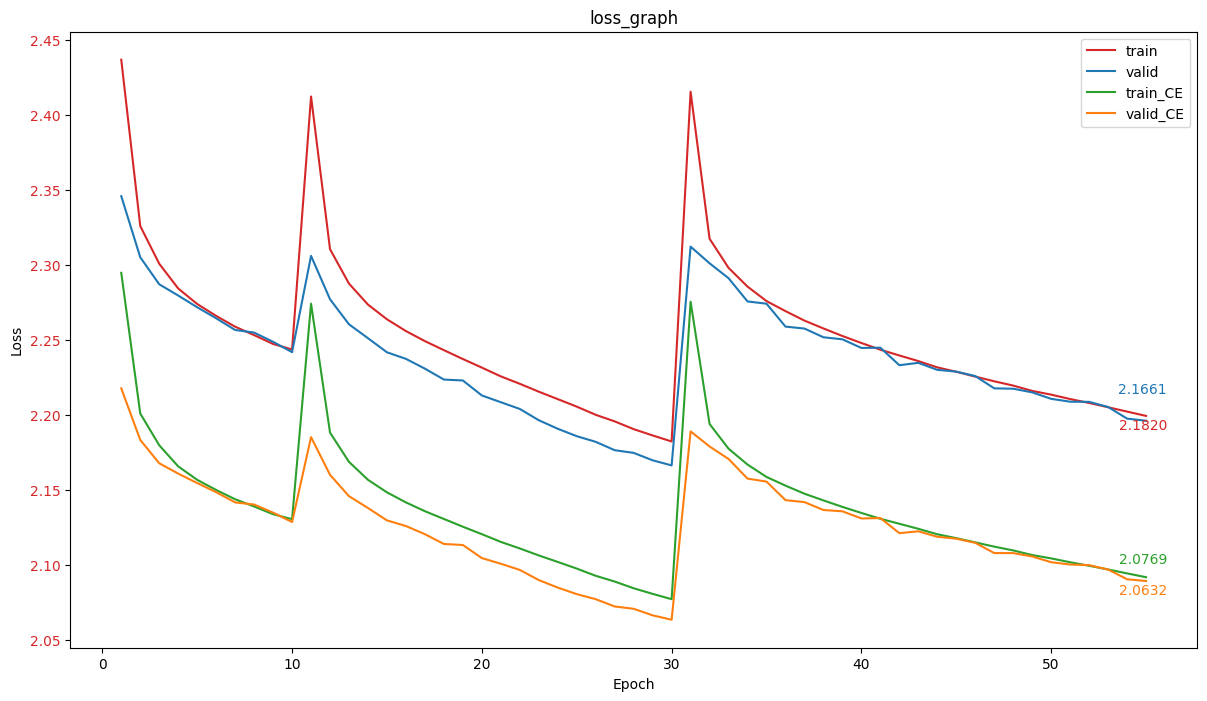

In [4]:
plt.figure(figsize=(32,8))
plt.subplot(121)
plt.title('loss_graph')
(loss_graph(a_show, b_show, c_show, d_show))
plt.show()

##### epoch 10에서 한 번 학습 종료 후에 다시 했었음.